# Variance reduction method

Using usual Monte-Carlo method for estimating the mean value (for example, to find an integral as in Lecture 2),
we have the following estimate
$$
\mathbb E_\rho(f)=\int\limits_a^bf(x)\rho(x)\,\text{d}x\approx\frac1N\sum\limits_{i=1}^Nf(x_i),
$$
where $\{x_i\}$ are samples of the random variable $\xi$ with probability density function $\rho$.

In general, if we estimate the mean by the averaging the samples
$$
\mathbb E(\xi)\approx\hat\xi_N=\frac1N\sum\limits_{i=1}^Nx_i,
$$
then by [central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem)
we have the estimate for the deviation
$$
\lim_{N\to\infty}\mathbb P\left(\left|\hat\xi_N - \mathbb E(\xi) \right|<x\frac{\sqrt{\text{Var}(\xi)}}{\sqrt N}\right)=
\Phi(x)
$$
for any $x>0$, where
$$
\Phi(x)=\frac2{\sqrt{2\pi}}\int\limits_0^x\exp(-\tau^2/2)\,\text{d}\tau.
$$

It means, that for the given random variable $\xi$ the error of the approximation $\varepsilon$ has the following asymptotic $\varepsilon\sim\frac{\sqrt{\text{Var}(\xi)}}{\sqrt N}$.

We have seen (in Lecture 2) one of the way to reduce variance — *importance sampling*.

If we want to estimate the integral
$$
\mathbb E_\rho(f)=\int_a^bf(x)\rho(x)\,\text{d}x,
$$
we can use the *importance sample fundamental identity*
$$
\mathbb E_\rho(f)=\int_a^bf(x)\frac{\rho(x)}{g(x)}g(x)\,\text{d}x=
\mathbb E_g\left(f(x)\frac{\rho(x)}{g(x)}\right),
$$
where the function $g(x)>0$ has the meaning of probability density function of another random variable,
subscript $g$ means that the expectation is taken with respect to the density $g$.

Hence, we can estimate the value of interest
$$
\mathbb E_\rho(f)\approx
\frac1N\sum_{i=1}^Nf(y_i)\frac{\rho(y_i)}{g(y_i)}
$$
with samples $\{y_i\}$ of the distribution with PDF $g$.

What is the best choice of function $g$?

**Theorem.** The choice of $g$ that minimizes the variance of the estimator in the importance sampling method is
$$
g^*(x)=\frac{\bigl|f(x)\bigr|\rho(x)}{\int_a^b\bigl|f(\tau)\bigr|\rho(\tau)\,\text{d}\tau}.
$$
*Proof.*
Note, that
$$
\text{Var}\left[\frac{f(\xi)\rho(\xi)}{g(\xi)}\right]=
\mathbb E_g\left[\frac{f^2(\xi)\rho^2(\xi)}{g^2(\xi)}\right]-
\left(\mathbb E_g\left[\frac{f(\xi)\rho(\xi)}{g(\xi)}\right]\right)^2.
$$
The second term does not depend on $g$ (we take an expectation with respect to the probability density $g$),
so we need to minimize only the first term.
From [Jensen's inequality](https://en.wikipedia.org/wiki/Jensen%27s_inequality) it follows that 
$$
\mathbb E_g\left[\frac{f^2(\xi)\rho^2(\xi)}{g^2(\xi)}\right]\geq
\left(\mathbb E_g\left[\frac{\bigl|f(\xi)\bigr|\rho(\xi)}{g(\xi)}\right]\right)^2=
\left(
\int_a^b\bigl|f(\tau)\bigr|\rho(\tau)\,\text{d}\tau
\right)^2.
$$
Function $g^*$ gives us equality in the last calculations (Why?).
This finishes the proof.

From the practical point of view, when $f(x)>0$, we need to know the value of the integral itself to build $g^*$, so we can not use the Theorem directly. But the Theorem suggests looking for such functions $g$, that
$$
\frac{\bigl|f(x)\bigr|\rho(x)}{g(x)}
$$
is almost constant (and has a small variance).

As an **example**, consider the *small tail probalities*. (See *Monte Carlo Statistical Methods*  by C. Robert, G. Casella, Sec. 3.3).

Consider a normally distributed random variable $\xi\sim\mathcal N(0,1)$.
We want to compute the probability
$$
p=\mathbb P[\xi>4.5].
$$

The naïve Monte-Carlo method tells us to generate $n$ samples $\{x_1,\,x_2,\,\ldots,\,x_n\}$ of the $\xi$
and calculate the ratio of the number of elements greater than $4.5$ to the total number $n$
$$
p_n=\frac{\#\{x_i\colon x_i>4.5\}}n=\frac1n\sum_{i=1}^n\mathbb I_{(4.5,\,+\infty)}(x_i),
$$
where $\mathbb I_A$ is the indicator function of the set $A$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n_mc = 10**5
num_in_set = 0
for i in range(n_mc):
    x = np.random.randn()
    num_in_set += bool(x > 4.5)

p_n = float(num_in_set) / n_mc
print('p_n = {}'.format(p_n))

p_n = 1e-05


Sure, if we increase the number of sample points, we will get the reasonable result, but the computation time will be extremely large.

In the notation of the proposed approach, we want to estimate the mean of the function 
$$
f(x)=I_{(4.5,\,+\infty)}(x)
$$
over a random variable $\xi\sim\mathcal N(0,1)$ with the well-known density
$$
\rho(x)=\frac1{\sqrt{2\pi}}\exp\left(-x^2/2\right)
$$
as
$$
p=\mathbb P[\xi>4.5]=
\int_{4.5}^\infty\rho(x)\,\text{d}x=
\int_{-\infty}^\infty f(x)\rho(x)\,\text{d}x.
$$

Using the ideology of importance sampling, we should take only samples larger than $4.5$.
In this example we will take the random variable with the following density $g$
$$
g(x)=\frac1c\exp(-x)\mathbb I_{(4.5,\,+\infty)}(x).
$$

The normalization constant $c$ is found from condition
$$
\int_{-\infty}^\infty g(x)\,\text{d}x=1,
$$
so
$$
\int_{-\infty}^{+\infty}\frac1c\exp(-x)I_{(4.5,\,+\infty)}(x)\,\text{d}x=
\int_{4.5}^{+\infty}\frac1c\exp(-x)\,\text{d}x
=\frac1c\exp(-4.5)
=1\,\Longrightarrow\, c= \exp(-4.5)
$$
and
$$
g(x)=\exp\bigl(-(x-4.5)\bigr)\mathbb I_{(4.5,\,+\infty)}(x).
$$

Let's plot this distributions.

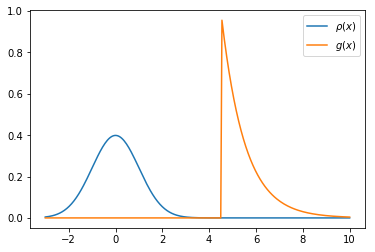

In [2]:
x = np.linspace(-3, 10, 2**8)
rho = np.exp(-x*x/2)/np.sqrt(2*np.pi)
g = np.exp(-(x-4.5))
g[x < 4.5] = 0
plt.plot(x, rho, label=r'$\rho(x)$');
plt.plot(x, g, label='$g(x)$');
plt.legend();

The importance sampling estimator is: 
$$
\hat p_n=\frac1n\sum_{i=1}^n\frac{f(y_i)\rho(y_i)}{g(y_i)}=
\frac1n\frac1{\sqrt{2\pi}}\sum_{i=1}^n\exp\bigl(-y_i^2/2+(y_i-4.5)\bigr),
$$
where $y_i$ are sampled from distribution $g$.
Here we skip the function $f(x)=\mathbb I_{(4.5,\,+\infty)}(x)$ as $f(y_i)=1$ almost sure.

Let's perform a simulation.

In [3]:
n_mc = 10**5
s = 0.
for i in range(n_mc):
    y = np.random.exponential() + 4.5 # shift y
    s += np.exp(-y*y/2.0 + y - 4.5)/np.sqrt(2.*np.pi)
p_n = s / n_mc


print('p_{} = {}'.format(n_mc, p_n))

p_100000 = 3.43413493348e-06


We can calculate the required probability with good accuracy using the python built-in error function erf.
$$
\text{erf}(x)=\frac2{\sqrt\pi}\int_0^x\exp(-\tau^2)\,\text{d}\tau,
$$
so
$$
\Phi(x) = 1/2\bigl(1 + \text{erf}(x/\sqrt2)\bigr),
$$
and
$$
p=1-\Phi(4.5)=\int_{4.5}^\infty\rho(x)\,\text{d}x.
$$

In [4]:
from scipy.special import erf

def Phi(x):
    return 0.5*(1.0 + erf(x/np.sqrt(2)))

print(1 - Phi(4.5))

3.3976731247387093e-06


## When importance sampling fails
$\color{red}{\text{It's very important to know the limitations and application area of any method used.}}$

We have shown above that the part of the variance that depends on $g$ is
$$
\mathbb E_g\left[\frac{f^2(\xi)\rho^2(\xi)}{g^2(\xi)}\right]=
\int_a^b\frac{f^2(x)\rho^2(x)}{g(x)}\,\text{d}x
$$
should be small.
Actually, the method will work in all the cases, when this expression is finite (but maybe worth then standard Monte-Carlo).

Now we will illustrate what happens if this integral diverges.

Let r.v. $\xi\sim\mathcal E(1)$ is exponential with unit rate, so the PDF is
$$
\rho(x)=\exp(-x)\mathbb I_{(0,\,+\infty)}(x).
$$
Let $f(x)=x$, and we want to compute $\mathbb E_\rho(f)=\mathbb E(\xi)$ which is known to be $1$, so
$$
p=1.
$$

As importance sampling density we will take the density of a standard normal distribution
$$
g(x)=\frac1{\sqrt{2\pi}}\exp(-x^2/2)
$$

The integral from the variance
$$
\int_{-\infty}^{+\infty}\frac{f^2(x)\rho^2(x)}{g(x)}\,\text{d}x=
\sqrt{2\pi}\int_0^{+\infty}x^2\exp\left(x^2/2-2x\right)\,\text{d}x=
\infty.
$$

Let compute the Monte-Carlo simulations.

In [5]:
from scipy.stats import norm
num_tries = 10
n_mc = 10**3
I = np.empty((num_tries, n_mc))
for i in range(num_tries):
    s = 0.
    for j in range(n_mc):
        x = np.random.randn()
        if x >= 0.:
            s += x * np.exp(-x) / norm.pdf(x)
        I[i, j] = s / (j + 1)


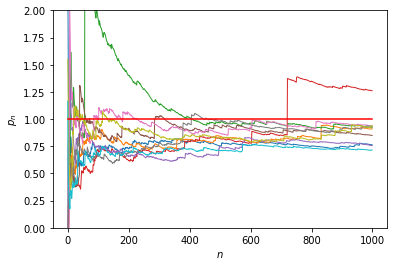

In [6]:
# Plot the data
for i in range(num_tries):
    plt.plot(I[i], lw=1)
plt.xlabel('$n$')
plt.ylabel('$p_n$')
plt.plot(np.ones(n_mc), color='r');
plt.ylim([0,2]);

So, we can see that Monte-Carlo simulations do not stabilize, that is, they have different limits with different runs of the simulation.

# Latin Hypercube Designs

Latin hypercube designs (LHS) are quasi-random sequences with low-discrepancy, that give better accuracy is some cases. 

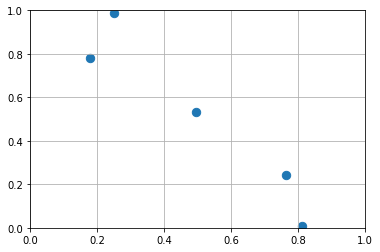

In [7]:
from pyDOE import lhs
dim = 2
X = lhs(dim, samples=5)
plt.scatter(X[:, 0], X[:, 1], 70);
plt.grid(b=1, which='major')
plt.xlim([0,1]); plt.ylim([0,1]);

In each row and in each column of the grid we have exactly one point, but their positions will change from launch to launch.
In the higher dimensions this idea is generalized, exactly one point lies on the corresponding *hyperplane*.

### Solving an ODE with random parameters

(Here we will follow the ODE solution by Ilias Bilionis, see https://github.com/PredictiveScienceLab/uq-course )

We will use Monte-Carlo method for simulating the solution of a simple differential equation.

Conider an equation
$$
\frac{dx(t)}{dt}=-ax(t),\qquad x(0)=x_0.
$$
We know the solution of this ODE:
$$
x(t)=x_0\exp(-at).
$$

Now, let parameters $a$ and $x_0$ be random variables.
Assume they have uniform distribution:
$$
a\sim\mathcal U(0,\, 0.1),\quad
x_0\sim\mathcal U(5,\,9).
$$

We use ```scipy.integrate``` to solve the equation.

In [8]:
import scipy
def solution(args, nt=300, T=50, return_t=False):
    a, x0 = args
    # rescale them as imputs are uniform on (0,1)
    a = a*0.1
    x0 = 5.0 + 4.0*x0
    
    def rhs(y, t):
        return - a * y
    
    t = np.linspace(0, T, nt)
    x = scipy.integrate.odeint(rhs, x0, t).flatten()
    return (t, x) if return_t else x
    

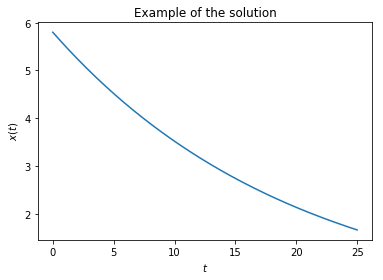

In [9]:
t, x = solution((0.5, 0.2), T=25, return_t=True)
plt.plot(t, x);
plt.xlabel('$t$');
plt.ylabel('$x(t)$');
plt.title('Example of the solution');

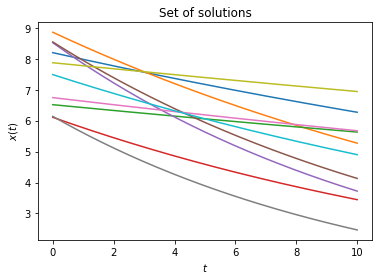

In [10]:
for i in xrange(10):
    params = np.random.rand(2)
    t, x = solution(params, T=10, return_t=True)
    plt.plot(t, x)
plt.xlabel('$t$')
plt.ylabel('$x(t)$');
plt.title('Set of solutions');

#### Propagating Uncertainties with MC

Now we will use simple Monte-Carlo method to model the uncertainties in the parameters  of the ODE.
The mean and the variance of the solution will be calculated. 

In [11]:
num_times = 300
num_samples = 10**4

x_mc  = np.zeros(num_times)
x2_mc = np.zeros(num_times)

data_mc = np.empty((num_samples, num_times))

for i in range(num_samples):
    args = np.random.rand(2)
    t, x = solution(args, nt=num_times, return_t=True)
    x_mc  += x
    x2_mc += x**2
    data_mc[i, ...] = x
    
x_mean_mc = x_mc  / num_samples
x_var_mc  = x2_mc / num_samples - x_mean_mc**2

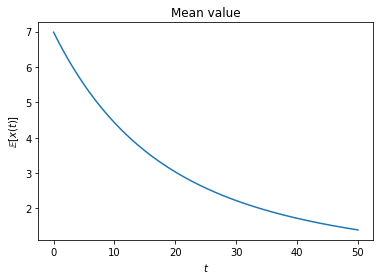

In [12]:
plt.plot(t, x_mean_mc)
plt.xlabel('$t$');
plt.ylabel(r'$\mathbb{E}[x(t)]$');
plt.title('Mean value');

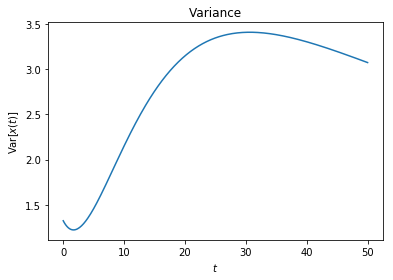

In [13]:
plt.plot(t, x_var_mc)
plt.xlabel('$t$');
plt.ylabel(r'Var$[x(t)]$');
plt.title('Variance');

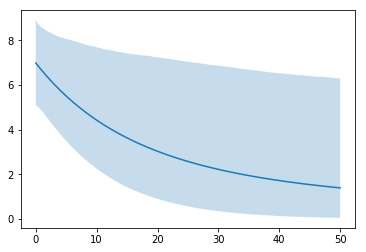

In [14]:
x_low_mc   = np.percentile(data_mc, 2.75, axis=0)
x_upper_mc = np.percentile(data_mc, 97.5, axis=0)
plt.plot(t, x_mean_mc)
plt.fill_between(t, x_low_mc, x_upper_mc, alpha=0.25);

#### Propagating Uncertainties with LHS

Now will do the same things but using LHS sampling for model inputs.

In [15]:
x_lhs  = np.zeros(num_times)
x2_lhs = np.zeros(num_times)

data_lhs = np.empty((num_samples, num_times))
LHS_samples = lhs(2, num_samples, criterion='c')

for i in range(num_samples):
    args = LHS_samples[i, :]
    t, x = solution(args, nt=num_times, return_t=True)
    x_lhs  += x
    x2_lhs += x**2
    data_lhs[i, ...] = x
    
x_mean_lhs = x_lhs  / num_samples
x_var_lhs  = x2_lhs / num_samples - x_mean_lhs**2

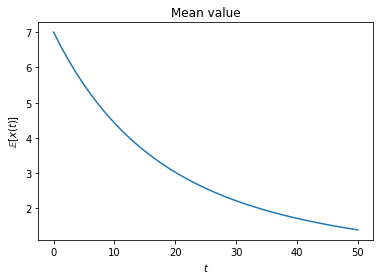

In [16]:
plt.plot(t, x_mean_lhs)
plt.xlabel('$t$');
plt.ylabel(r'$\mathbb{E}[x(t)]$');
plt.title('Mean value');

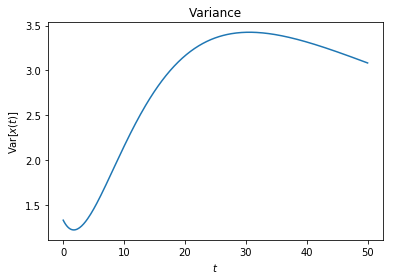

In [17]:
plt.plot(t, x_var_lhs)
plt.xlabel('$t$');
plt.ylabel(r'Var$[x(t)]$');
plt.title('Variance');

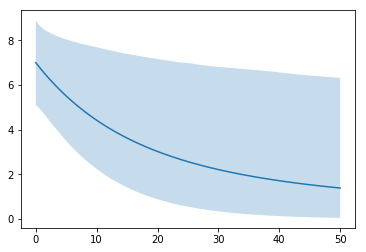

In [18]:
x_low_lhs   = np.percentile(data_lhs, 2.75, axis=0)
x_upper_lhs = np.percentile(data_lhs, 97.5, axis=0)
plt.plot(t, x_mean_lhs)
plt.fill_between(t, x_low_lhs, x_upper_lhs, alpha=0.25);

#### Exact values

Hopefully, we can find exact mean and variance of the solution.

Let $\xi_1$ and $\xi_2$ be random variables, uniformly distributed on $(0,1)$.
Then our ODE reads as follows
$$
\frac{dx(t)}{dt}=-0.1\xi_1x(t),\qquad x(0)=5 + 4\xi_2,
$$
with the solution
$$
x(t, \xi_1, \xi_2)=(5 + 4\xi_2)\exp(-0.1\xi_1t).
$$
We can integrate and get the moments of $x$:
$$
\mu=\mathbb E(x)=
\int_0^1\int_0^1x(t, \xi_1, \xi_2)\,\text{d}\xi_1\,\text{d}\xi_2
=
\frac{70}t\bigl(1-\exp(-0.1t)\bigr)
$$
$$
S=\text{Var}(x)=\ldots=\frac{755}{3t}\bigl(1-\exp(-0.2t)\bigr)-\mu^2.
$$

Let's plot our data on one figure.

In [19]:
def true_mean_(t):
    if t==0:
        return 7.0
    return 70./t*(1-np.exp(-0.1*t))

true_mean = np.vectorize(true_mean_)

def true_var_(t):
    if t==0:
        return 4.0/3.0
    return 755.0/(3.0*t)*(1-np.exp(-0.2*t)) - true_mean(t)**2

true_var = np.vectorize(true_var_)

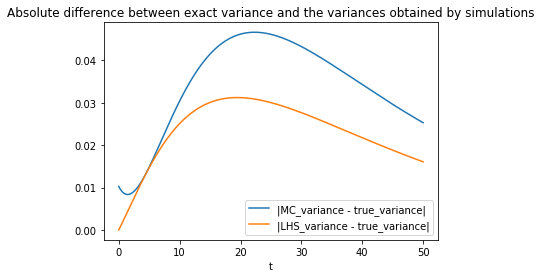

In [20]:
plt.plot(t, np.abs(x_var_mc  - true_var(t)), label='|MC_variance - true_variance|');
plt.plot(t, np.abs(x_var_lhs - true_var(t)), label='|LHS_variance - true_variance|');
plt.xlabel('t')
plt.title('Absolute difference between exact variance and the variances obtained by simulations')
plt.legend();

Well, the difference depends on the value $t$ and seems to be rather small for both methods (the actual plot will differ from run to run).

But let's check the convergence of each method.
We will compute the dependence of the *root square error* in the variance on the number of samples $n$
$$
\text{RSE}(n) = \left(\sum_{i=1}^n\bigl(\text{Var}[x(t_i)] - \text{Var}_n[x(t_i)]\bigr)^2\right)^{1/2},
$$
where $\text{Var}$ is the exact variance and $\text{Var}_n$ is the variance obtained in each of the methods.  

In [21]:
def get_MC_rse(max_num_samples=100, num_times=300, T=50):
    """
    Get the maximum error of MC.
    """
    t = np.linspace(0, T, num_times)
    x_var_true = true_var(t)
    x = np.zeros_like(x_var_true)
    x2 = np.zeros_like(x_var_true)
    n = []
    rse = []
    for i in range(max_num_samples):
        args = np.random.rand(2)
        x_sample = solution(args, nt=num_times, return_t=False)
        x  += x_sample
        x2 += x_sample ** 2
        n.append(i + 1)
        x_m = x / (i + 1)
        x_v = x2 / (i + 1) - x_m ** 2
        rse.append(np.linalg.norm(x_var_true - x_v))
    return n, rse

def _get_LHS_rse(max_num_samples=100, num_times=300, T=50):
    t = np.linspace(0, T, num_times)
    x_var_true = true_var(t)
    x = np.zeros_like(x_var_true)
    x2 = np.zeros_like(x_var_true)
    n = []
    rse = []
    LHS_samples = lhs(2, max_num_samples, criterion='c', iterations=100)
    for i in range(max_num_samples):
        args = LHS_samples[i, :]
        x_sample = solution(args, nt=num_times, return_t=False)
        x  += x_sample
        x2 += x_sample ** 2
        n.append(i + 1)
        x_m = x / (i + 1)
        x_v = x2 / (i + 1) - x_m ** 2
        rse.append(np.linalg.norm(x_var_true - x_v))
    return n, rse

def get_LHS_rse(max_num_samples=100, num_times=300, T=50):
    n = []
    rse = []
    for i in range(max_num_samples):
        _n, _rse = _get_LHS_rse(i + 1, num_times=num_times, T=T)
        n.append(_n[-1])
        rse.append(_rse[-1])
    return n, rse

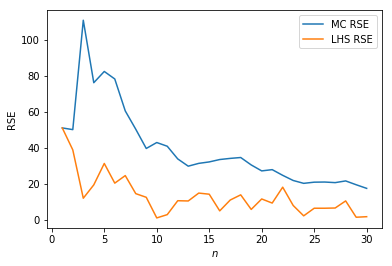

In [22]:
n_mc, rse_mc = get_MC_rse(30)
n_lhs, rse_lhs = get_LHS_rse(30)
plt.plot(n_mc, rse_mc, label='MC RSE')
plt.plot(n_lhs, rse_lhs, label='LHS RSE')
plt.xlabel('$n$');
plt.ylabel('RSE');
plt.legend(loc='best');

Both methods looks the same. Note, that the plot will change form run to run. So, we can average this type of plots, and get the mean and the variance of the RSE.

In [23]:
num_exper = 5
num_samples = 10
rse_mc_samples = []
rse_lhs_samples = []
for i in xrange(num_exper):
    # print(i)
    n_mc, rse_mc = get_MC_rse(num_samples)
    n_lhs, rse_lhs = get_LHS_rse(num_samples)
    rse_mc_samples.append(rse_mc)
    rse_lhs_samples.append(rse_lhs)
rse_mc_samples = np.array(rse_mc_samples)
rse_lhs_samples = np.array(rse_lhs_samples)
rse_mc_m = np.mean(rse_mc_samples, axis=0)
rse_mc_l = np.percentile(rse_mc_samples, 2.75, axis=0)
rse_mc_u = np.percentile(rse_mc_samples, 97.5, axis=0)
rse_lhs_m = np.mean(rse_lhs_samples, axis=0)
rse_lhs_l = np.percentile(rse_lhs_samples, 2.75, axis=0)
rse_lhs_u = np.percentile(rse_lhs_samples, 97.5, axis=0)

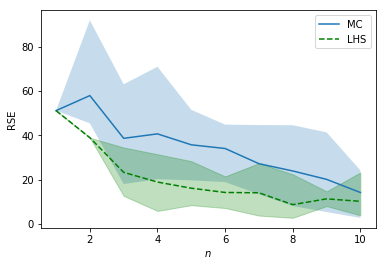

In [24]:
plt.plot(n_mc, rse_mc_m, label='MC')
plt.plot(n_lhs, rse_lhs_m, '--', color='g', label='LHS')
plt.fill_between(n_mc, rse_mc_l, rse_mc_u, alpha=0.25)
plt.fill_between(n_lhs, rse_lhs_l, rse_lhs_u, color='g', alpha=0.25)
plt.legend(loc='best')
plt.xlabel('$n$')
plt.ylabel('RSE');

**Independent work**

- Try to increase the value of ```num_exper``` to get a more accurate picture of the convergence (the computations may take a lot of time) and take different values of ```num_samples```. Find a difference between the methods.

- Use another low-discrepancy sequence, for example, Halton sequence for the previous Lecture. Compare the results.